In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from sklearn.datasets import make_gaussian_quantiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

X1, y1 = make_gaussian_quantiles(cov=3.,
                                 n_samples=10000, n_features=2,
                                 n_classes=2, random_state=1)
X1 = pd.DataFrame(X1,columns=['x','y'])
y1 = pd.Series(y1)

In [3]:
X1

,x,y
0,0.759772,1.418316
1,2.429896,-2.974839
2,-1.312662,-3.837630
3,1.544247,0.904236
4,0.675905,3.471664
...,...,...
9995,-1.519436,-0.076489
9996,-2.862951,1.931277
9997,-0.977937,0.364132
9998,-3.888984,-2.809069


In [4]:
y1

0       0
1       1
2       1
3       0
4       1
       ..
9995    0
9996    1
9997    0
9998    1
9999    0
Length: 10000, dtype: int64

<Axes: xlabel='x', ylabel='y'>

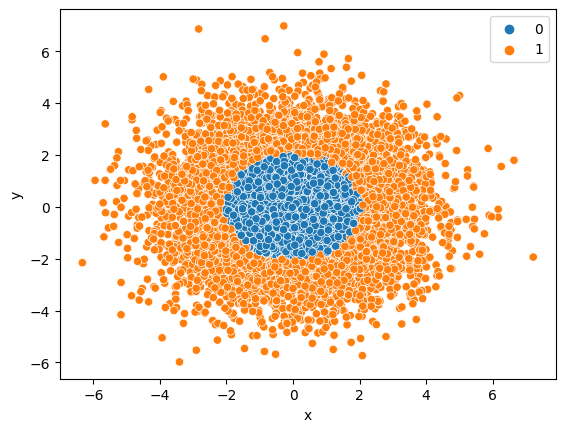

In [5]:
sns.scatterplot(x=X1.iloc[:,0], y=X1.iloc[:,1], hue=y1)



In [6]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=2))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

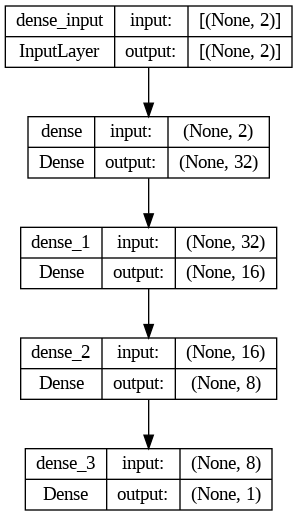

In [7]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [8]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [9]:
model.fit(X1, y1, epochs=50, verbose=1)

Epoch 1/50
313/313 [==============================] - 5s 5ms/step - loss: 0.4545 - accuracy: 0.7580
Epoch 2/50
313/313 [==============================] - 2s 5ms/step - loss: 0.0947 - accuracy: 0.9822
Epoch 3/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0521 - accuracy: 0.9877
Epoch 4/50
313/313 [==============================] - 2s 6ms/step - loss: 0.0415 - accuracy: 0.9879
Epoch 5/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0345 - accuracy: 0.9903
Epoch 6/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0313 - accuracy: 0.9911
Epoch 7/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0284 - accuracy: 0.9900
Epoch 8/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0268 - accuracy: 0.9912
Epoch 9/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0243 - accuracy: 0.9912
Epoch 10/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0241 - accuracy: 0.9907

9600/9600 [==============================] - 13s 1ms/step


TypeError: ignored

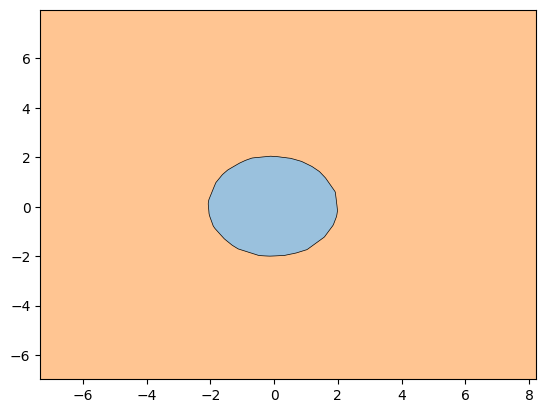

In [10]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X1.values, y=y1.values, clf=model, legend=2)

In [14]:
model.predict(X1)

313/313 [==============================] - 0s 1ms/step


array([[2.0704062e-08],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [4.4519486e-14],
       [1.0000000e+00],
       [8.1487582e-16]], dtype=float32)

In [12]:
loss, accuracy = model.evaluate(x=X1, y=y1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0201 - accuracy: 0.9911


In [13]:
print(f"Model having Loss of {loss} and accuracy with {accuracy}")

Model having Loss of 0.020140156149864197 and accuracy with 0.991100013256073
